In [58]:
import shapely
from copy import deepcopy
wkt = "Polygon ((102546.43760339204163756 6213433.46212699543684721, 102546.71589938903343864 6213433.8959445720538497, 102552.30509938969044015 6213430.31084457412362099, 102553.4962993891822407 6213432.16844457387924194, 102559.4800993896642467 6213428.33084457367658615, 102555.43059938914666418 6213422.01524457056075335, 102549.40719938963593449 6213425.87804457265883684, 102548.21119938918855041 6213424.01334457192569971, 102542.66049938951618969 6213427.57424457464367151, 102543.54018570030166302 6213428.94553050212562084, 102540.86269938971963711 6213430.66254457179456949, 102543.75979938937234692 6213435.18034457322210073, 102546.43760339204163756 6213433.46212699543684721))"	
fp_orig = shapely.from_wkt(wkt)

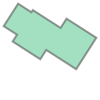

In [52]:
fc

In [33]:
import dtcc_wrangler
import dtcc_wrangler.geometry.polygons
from dtcc_wrangler.geometry.polygons import fix_clearance, remove_slivers, remove_short_edges, widen_gaps,  buffer_intersect_bounds

In [31]:
tc = 2
buf_amount = (tc - shapely.minimum_clearance(fp)) / 2

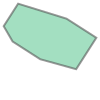

In [39]:
shapely.convex_hull(fp)

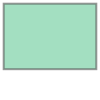

In [40]:
fix_clearance(fp, tc)

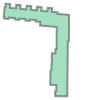

In [103]:
wkt = "Polygon ((102311.92599938619241584 6213415.53704457264393568, 102312.01529938631574623 6213416.49534457549452782, 102311.45489938675018493 6213416.54824457410722971, 102312.09399938592105173 6213423.37294457387179136, 102312.53200343600474298 6213423.33148789312690496, 102312.77229938673553988 6213425.90174457058310509, 102316.01729938692005817 6213425.59804457146674395, 102315.77367483246780466 6213423.02466665860265493, 102319.96642579774197657 6213422.6278266329318285, 102320.20519938596407883 6213425.17784457188099623, 102323.24359938628913369 6213424.89364457316696644, 102323.00482782391190995 6213422.34024465084075928, 102327.263016093565966 6213421.9372110441327095, 102327.50209938663465437 6213424.49394457321614027, 102330.65479938618955202 6213424.1993445735424757, 102330.41634827124653384 6213421.63875102903693914, 102334.48999355135310907 6213421.25318424589931965, 102334.7297993866231991 6213423.81764457374811172, 102337.89059938609716482 6213423.52114457450807095, 102337.64936805199249648 6213420.95415233634412289, 102341.93355546085513197 6213420.54865792579948902, 102342.17409938700438943 6213423.12004457227885723, 102345.25459938641870394 6213422.83074457291513681, 102345.01483227529388387 6213420.25701789557933807, 102349.14559938714955933 6213419.86604457255452871, 102349.04683107540768106 6213418.83065682649612427, 102357.07479938653705176 6213418.07944457419216633, 102357.0133993864437798 6213399.6293445723131299, 102356.21541249330039136 6213399.63232035748660564, 102355.83269938713056035 6213361.27364457305520773, 102348.08879938661993947 6213361.35054457280784845, 102348.09119938634103164 6213361.61064457520842552, 102347.30069938654196449 6213361.61854457575827837, 102347.33039938703586813 6213364.71744457073509693, 102348.12089938741701189 6213364.70964457280933857, 102348.16599938688159455 6213369.12644457351416349, 102343.91619938651274424 6213369.26254457142204046, 102344.06419938658655155 6213379.03154457174241543, 102344.77139938676555175 6213379.72524457052350044, 102344.81209938658867031 6213383.79174457490444183, 102345.01273345123627223 6213383.78973840642720461, 102345.09619938625837676 6213391.25504457298666239, 102347.5957967141730478 6213391.22807487286627293, 102347.62559938681079075 6213394.23524457029998302, 102348.41639938723528758 6213394.25744457170367241, 102348.42917675872740801 6213409.61127624940127134, 102336.69019938661949709 6213410.71274457219988108, 102336.92239938621059991 6213413.19584457203745842, 102333.76259938640578184 6213413.49134457111358643, 102333.85179938781948294 6213414.44964458420872688, 102329.77779938571620733 6213414.83234456181526184, 102329.6885993867617799 6213413.8730445746332407, 102326.53389938663167413 6213414.16864457167685032, 102326.62509938659786712 6213415.12704457622021437, 102322.36669938618433662 6213415.52574457135051489, 102322.27539938619884197 6213414.56734457146376371, 102319.23799938647425734 6213414.85254457499831915, 102319.32819938688771799 6213415.80984457489103079, 102314.94549938662385102 6213416.2208445705473423, 102314.85519938640936743 6213415.26254457049071789, 102311.92599938619241584 6213415.53704457264393568))"
fp_orig = shapely.from_wkt(wkt)
polygon = deepcopy(fp_orig)


In [107]:
polygon = deepcopy(fp_orig)
target_clearance = 2
min_clearance = shapely.minimum_clearance(polygon)
polygon = remove_slivers(polygon, min_clearance / 2)
wg_polygon = widen_gaps(polygon, target_clearance)
polygon = remove_short_edges(polygon, target_clearance)
print(shapely.minimum_clearance(polygon))

for i in range(5):
    print(f"start clearance: {shapely.minimum_clearance(polygon)}")
    buf_amount = (target_clearance - shapely.minimum_clearance(polygon)) / 2
    print(f"buf amount: {buf_amount}")
    polygon = buffer_intersect_bounds(polygon, buf_amount, True)
    
    polygon = polygon.simplify(buf_amount / 4, True)
    polygon = remove_slivers(polygon, buf_amount / 4)
    print(f"end clearance: {shapely.minimum_clearance(polygon)}")


polygon

0.2006440943785218
start clearance: 1.1155539666165128
buf amount: 0.4422230166917436
end clearance: 0.46139791896496096
start clearance: 2.108726894657233
buf amount: -0.05436344732861653


GEOSException: IllegalArgumentException: Tolerance must be non-negative

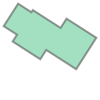

In [97]:
fp